In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from pathlib import Path
import preproc as pp

import numpy as np
import tensorflow as tf

version = "v2"
augp = Path("../scratch").joinpath("train_augmented_" + version)
modelp = Path("../scratch").joinpath("models")

train_ir, test_ir = pp.load_data(val_size=0)
train_aug, test_aug = pp.load_aug_data(augp, train_ir.element_spec, test_ind=[5])

2023-02-25 00:30:24.624394: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-25 00:30:26.788506: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-25 00:30:27.072036: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:ca:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.41GiB deviceMemoryBandwidth: 1.41TiB/s
2023-02-25 00:30:27.072069: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-25 00:30:27.075132: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-02-25 00:30:27.075198: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas

# Simple

In [3]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(
    filters=32
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(inputs)
x = tf.keras.layers.Conv2D(
    filters=32
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=32
    , kernel_size=2
    , strides=2
    , padding="valid"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=2
    , strides=2
    , padding="valid"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(
    512
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(
    256
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Dropout(0.3)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
net = tf.keras.Model(inputs=inputs, outputs=outputs)
net.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          16448     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0     

2023-02-25 00:31:02.628248: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-25 00:31:02.628273: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-02-25 00:31:02.628298: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-02-25 00:31:02.629622: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.11.1
2023-02-25 00:31:02.761651: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-25 00:31:02.761780: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/50


2023-02-25 00:31:03.330176: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-25 00:31:03.349480: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz
2023-02-25 00:31:03.417298: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-02-25 00:31:04.137441: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-02-25 00:31:09.131234: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


  1/844 [..............................] - ETA: 1:59:25 - loss: 2.4071 - accuracy: 0.0957

2023-02-25 00:31:11.330373: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


  3/844 [..............................] - ETA: 7:41 - loss: 2.3907 - accuracy: 0.1050  

2023-02-25 00:31:11.537937: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-25 00:31:11.537966: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-02-25 00:31:12.357294: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-02-25 00:31:12.357795: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-02-25 00:31:12.411895: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 195 callback api events and 183 activity events. 
2023-02-25 00:31:12.422680: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-25 00:31:12.454683: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: simple_logs/train/plugins/profile/2023_02_25_00_31_12
2023-02-25 00:31:12.474076: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzip

844/844 [==============================] - 27s 22ms/step - loss: 1.6537 - accuracy: 0.4069 - val_loss: 0.3429 - val_accuracy: 0.9004
Epoch 2/50
844/844 [==============================] - 23s 21ms/step - loss: 0.4409 - accuracy: 0.8652 - val_loss: 0.1969 - val_accuracy: 0.9403
Epoch 3/50
844/844 [==============================] - 21s 19ms/step - loss: 0.2917 - accuracy: 0.9110 - val_loss: 0.1562 - val_accuracy: 0.9523
Epoch 4/50
844/844 [==============================] - 21s 19ms/step - loss: 0.2311 - accuracy: 0.9300 - val_loss: 0.1328 - val_accuracy: 0.9594
Epoch 5/50
844/844 [==============================] - 21s 18ms/step - loss: 0.1978 - accuracy: 0.9407 - val_loss: 0.1138 - val_accuracy: 0.9654
Epoch 6/50
844/844 [==============================] - 21s 18ms/step - loss: 0.1743 - accuracy: 0.9475 - val_loss: 0.1090 - val_accuracy: 0.9668
Epoch 7/50
844/844 [==============================] - 21s 19ms/step - loss: 0.1576 - accuracy: 0.9525 - val_loss: 0.0931 - val_accuracy: 0.9713
Epo

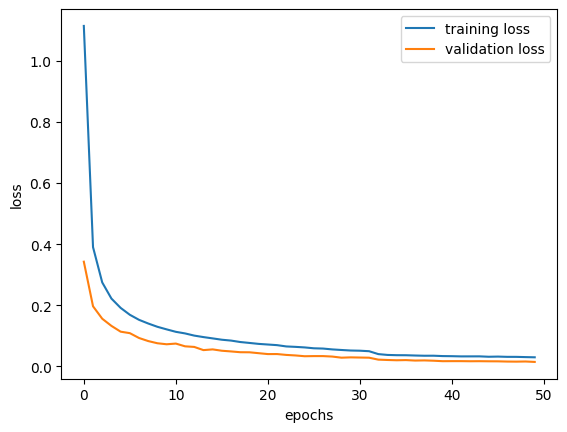

In [4]:
train_shape = tf.data.experimental.cardinality(train_aug).numpy()
val_size = 0.2

splitter = train_aug.shuffle(100000, reshuffle_each_iteration=True)
val_ds = splitter.take(train_shape * val_size).batch(512)
train_ds = splitter.skip(train_shape * val_size).batch(512)

net.compile(
    loss='categorical_crossentropy'
    , optimizer=tf.keras.optimizers.SGD(nesterov=True, momentum=0.9)
    # , optimizer="adam"
    , metrics=["accuracy"]
)

history = net.fit(
    train_ds
    , validation_data=val_ds
    , epochs=50
    , callbacks=[
        # tf.keras.callbacks.EarlyStopping(min_delta=0.001, patience=5)
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-5)
        , tf.keras.callbacks.TensorBoard(log_dir="simple_logs", histogram_freq=1, write_graph=True, write_images=True)
    ]
)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [7]:
augp = Path("../scratch").joinpath("train_augmented_v1")
# epochs=1
train_aug, _ = pp.load_aug_data(augp.resolve(), train_ir.element_spec, test_ind=[])
_ = net.fit(train_ir.concatenate(train_aug).shuffle(100000, reshuffle_each_iteration=True).batch(512), epochs=1)

1290/1290 [==============================] - 21s 14ms/step - loss: 0.0436 - accuracy: 0.9869


In [8]:
net.evaluate(train_ir.batch(512)), net.evaluate(test_ir.batch(512))

20/20 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 0.9914


([0.023315267637372017, 0.9926333427429199],
 [0.027467019855976105, 0.9914000034332275])

In [9]:
net.evaluate(train_ds), net.evaluate(val_ds), net.evaluate(test_aug.batch(512))

118/118 [==============================] - 2s 12ms/step - loss: 0.0896 - accuracy: 0.9722


([0.05602486431598663, 0.9820671081542969],
 [0.06695913523435593, 0.978768527507782],
 [0.08962440490722656, 0.9721666574478149])

In [23]:
net.save(modelp.joinpath("simple."+version+".h5").resolve().as_posix(), save_format="h5")